## Load data



In [9]:
import pandas as pd

df = pd.read_csv('/content/openmeteo_combined_islamabad_20250601-20260108.csv')

## Initial data inspection


In [10]:
display(df.head())
df.info()

,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,timestamp,temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation,city,latitude,longitude
0,24.1,12.0,564.0,11.2,3.2,76.0,2025-06-01 00:00:00,20.9,51,936.1,2.8,315,0.0,Islamabad,33.7215,73.0433
1,23.3,12.5,585.0,15.4,3.7,79.0,2025-06-01 01:00:00,21.8,64,937.5,2.5,94,0.0,Islamabad,33.7215,73.0433
2,24.2,16.5,627.0,20.9,4.5,84.0,2025-06-01 02:00:00,23.5,55,938.5,2.2,85,0.0,Islamabad,33.7215,73.0433
3,58.4,22.0,630.0,23.0,5.6,95.0,2025-06-01 03:00:00,26.0,41,939.2,6.5,120,0.0,Islamabad,33.7215,73.0433
4,88.5,27.1,549.0,18.4,7.1,117.0,2025-06-01 04:00:00,27.5,38,939.7,7.1,142,0.0,Islamabad,33.7215,73.0433


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5328 entries, 0 to 5327
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pm10                  5328 non-null   float64
 1   pm2_5                 5328 non-null   float64
 2   carbon_monoxide       5328 non-null   float64
 3   nitrogen_dioxide      5328 non-null   float64
 4   sulphur_dioxide       5328 non-null   float64
 5   ozone                 5328 non-null   float64
 6   timestamp             5328 non-null   object 
 7   temperature_2m        5328 non-null   float64
 8   relative_humidity_2m  5328 non-null   int64  
 9   surface_pressure      5328 non-null   float64
 10  wind_speed_10m        5328 non-null   float64
 11  wind_direction_10m    5328 non-null   int64  
 12  precipitation         5328 non-null   float64
 13  city                  5328 non-null   object 
 14  latitude              5328 non-null   float64
 15  longitude            

## Check for missing values



In [11]:
missing_values = df.isnull().sum()
display(missing_values)

,0
pm10,0
pm2_5,0
carbon_monoxide,0
nitrogen_dioxide,0
sulphur_dioxide,0
ozone,0
timestamp,0
temperature_2m,0
relative_humidity_2m,0
surface_pressure,0


## Summary statistics



In [12]:
display(df.describe())

,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation,latitude,longitude
count,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5328.000000,5.328000e+03,5.328000e+03
mean,52.213945,43.236486,1091.365428,44.206156,13.758915,75.844407,23.041329,63.122748,943.515203,5.943637,196.973724,0.186862,3.372150e+01,7.304330e+01
std,26.927559,21.864606,780.735975,34.116083,9.003425,60.844412,7.292675,19.453225,5.828827,3.351173,120.039140,0.974074,3.602790e-12,3.695169e-12
min,5.300000,5.100000,131.000000,0.000000,1.300000,0.000000,4.600000,9.000000,930.700000,0.200000,1.000000,0.000000,3.372150e+01,7.304330e+01
25%,31.900000,27.300000,522.000000,16.100000,7.200000,22.000000,17.600000,48.000000,938.600000,3.500000,86.000000,0.000000,3.372150e+01,7.304330e+01
50%,46.100000,38.500000,792.500000,35.100000,11.100000,63.000000,24.500000,64.000000,942.800000,5.400000,198.500000,0.000000,3.372150e+01,7.304330e+01
75%,67.300000,54.725000,1466.000000,66.000000,17.900000,122.000000,28.100000,79.000000,948.700000,7.900000,319.000000,0.000000,3.372150e+01,7.304330e+01
max,173.200000,146.200000,5018.000000,151.500000,51.800000,237.000000,44.000000,100.000000,956.400000,24.900000,360.000000,21.000000,3.372150e+01,7.304330e+01


## Explore categorical data


In [13]:
categorical_columns = df.select_dtypes(include='object').columns
if len(categorical_columns) > 0:
    for col in categorical_columns:
        print(f"Value counts for column: {col}")
        display(df[col].value_counts())
else:
    print("No categorical columns found.")


Value counts for column: timestamp


,count
timestamp,
2026-01-08 07:00:00,1
2026-01-08 06:00:00,1
2026-01-08 05:00:00,1
2026-01-08 04:00:00,1
2026-01-08 03:00:00,1
...,...
2025-06-01 04:00:00,1
2025-06-01 03:00:00,1
2025-06-01 02:00:00,1


Value counts for column: city


,count
city,
Islamabad,5328


## Visualize data distribution




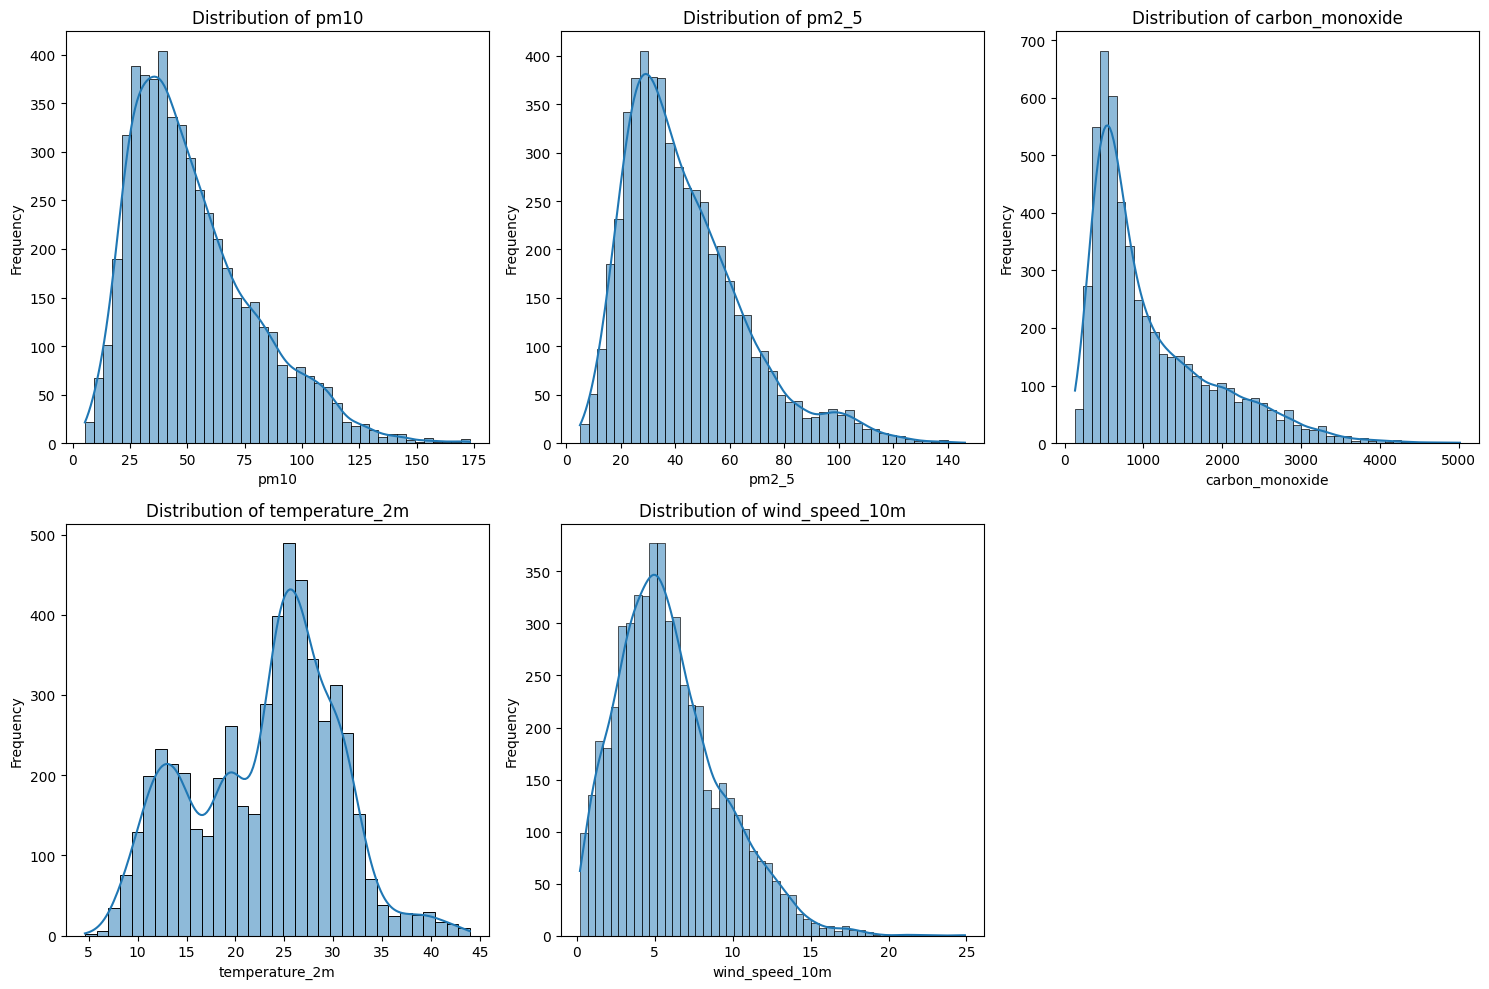

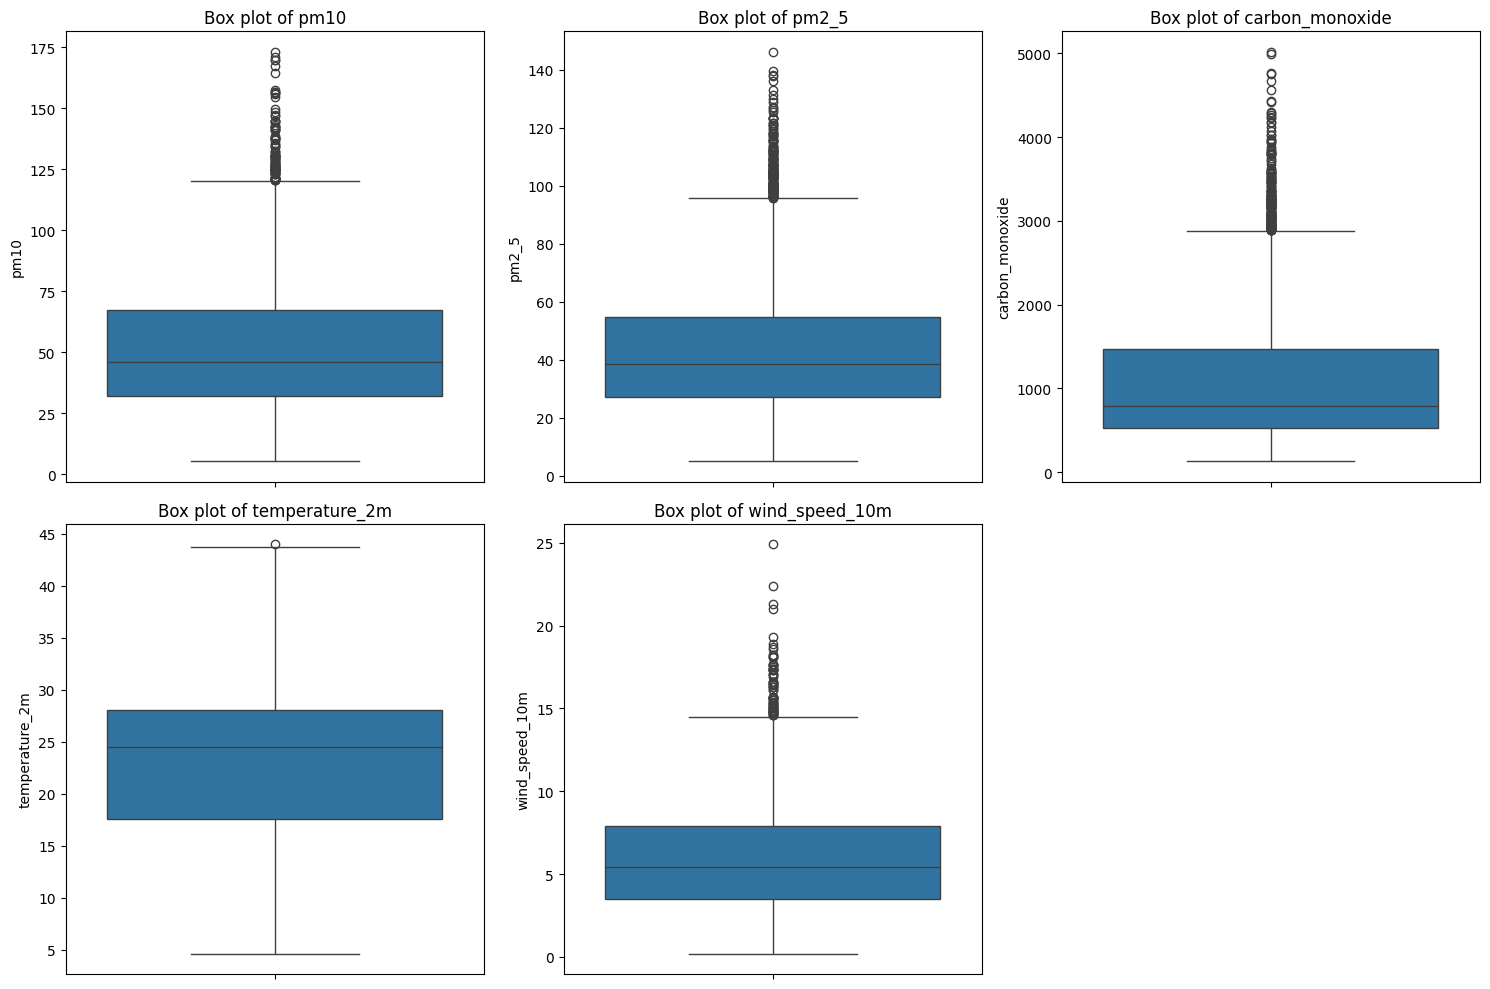

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['pm10', 'pm2_5', 'carbon_monoxide', 'temperature_2m', 'wind_speed_10m']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

## Analyze time series trends


In [15]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

time_series_cols = ['temperature_2m', 'pm2_5', 'wind_speed_10m']

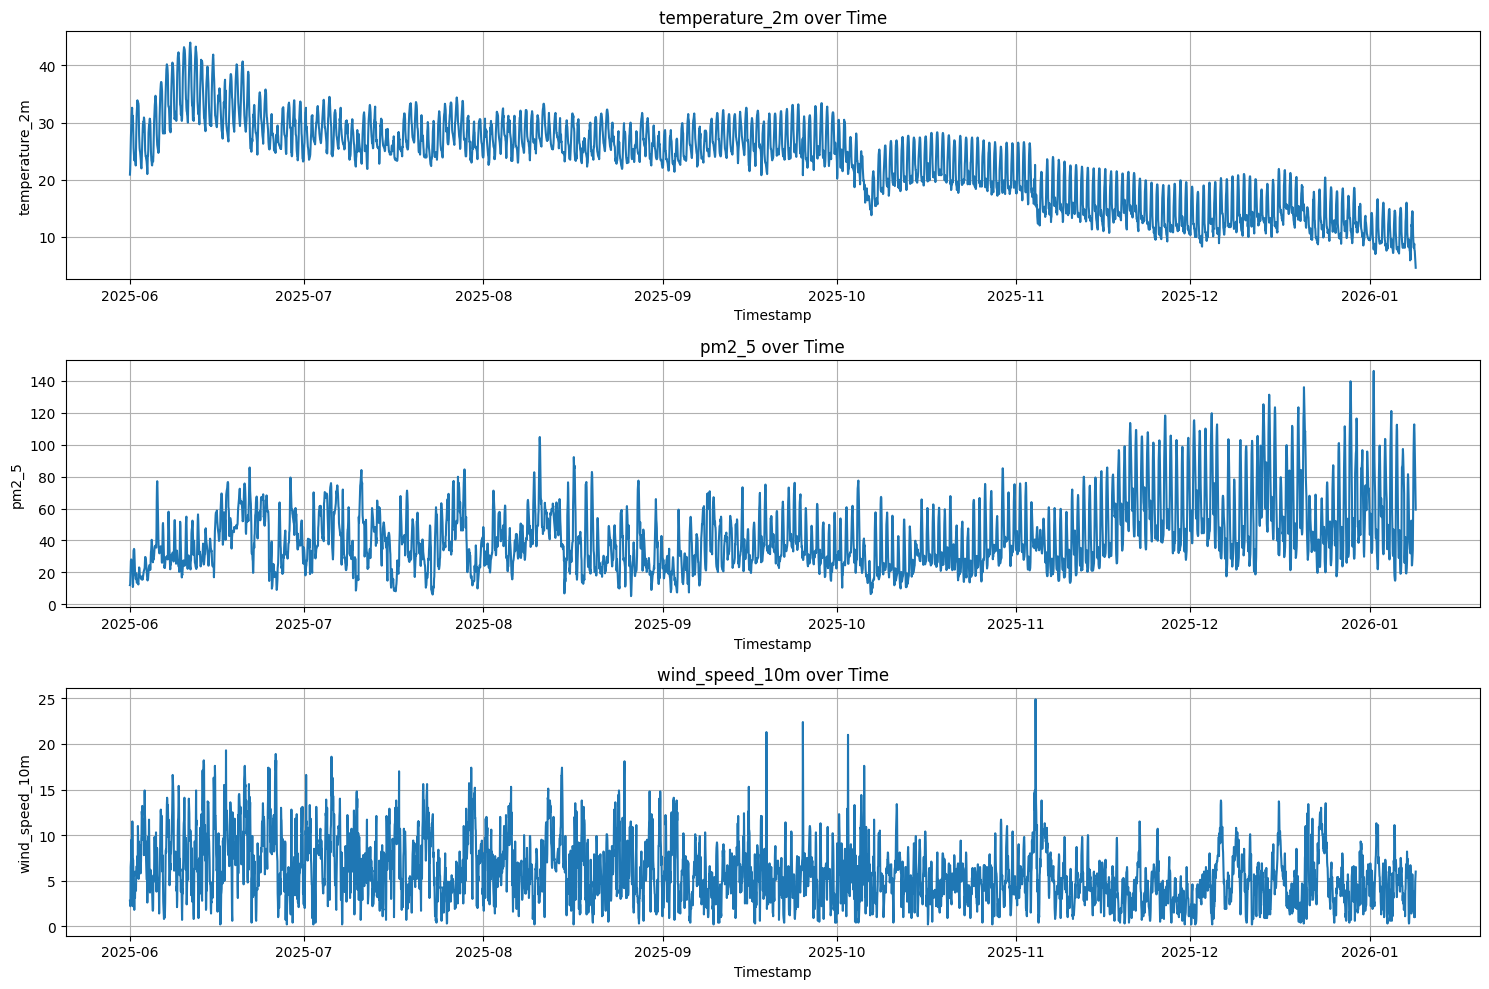

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, col in enumerate(time_series_cols):
    plt.subplot(len(time_series_cols), 1, i + 1)
    plt.plot(df.index, df[col])
    plt.title(f'{col} over Time')
    plt.xlabel('Timestamp')
    plt.ylabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

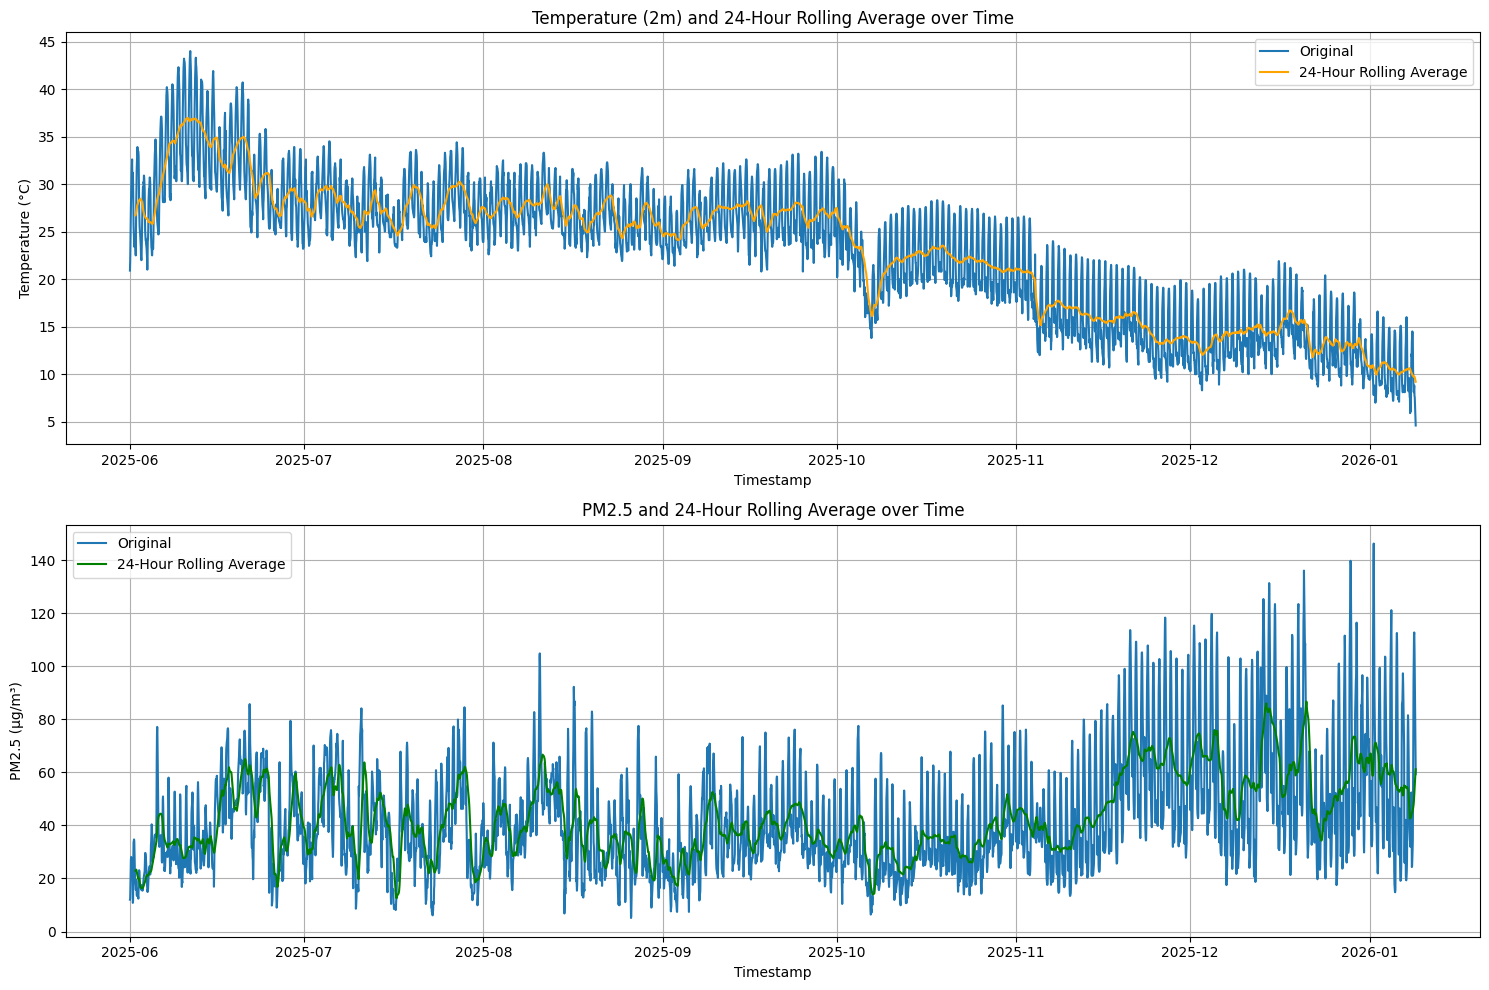

In [17]:
plt.figure(figsize=(15, 10))

# Rolling average for temperature_2m (24-hour window)
plt.subplot(2, 1, 1)
plt.plot(df.index, df['temperature_2m'], label='Original')
plt.plot(df.index, df['temperature_2m'].rolling(window=24).mean(), label='24-Hour Rolling Average', color='orange')
plt.title('Temperature (2m) and 24-Hour Rolling Average over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Rolling average for pm2_5 (24-hour window)
plt.subplot(2, 1, 2)
plt.plot(df.index, df['pm2_5'], label='Original')
plt.plot(df.index, df['pm2_5'].rolling(window=24).mean(), label='24-Hour Rolling Average', color='green')
plt.title('PM2.5 and 24-Hour Rolling Average over Time')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Identify correlations



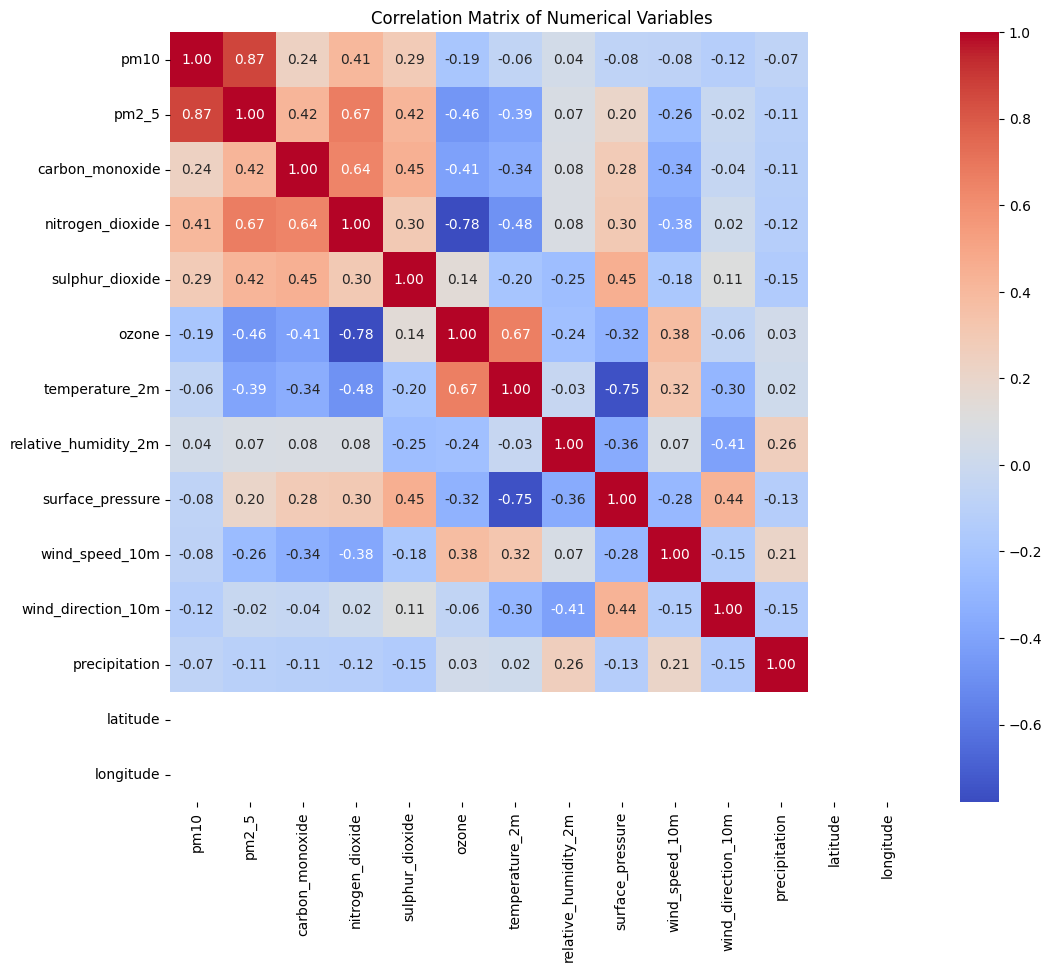

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Explore specific trends



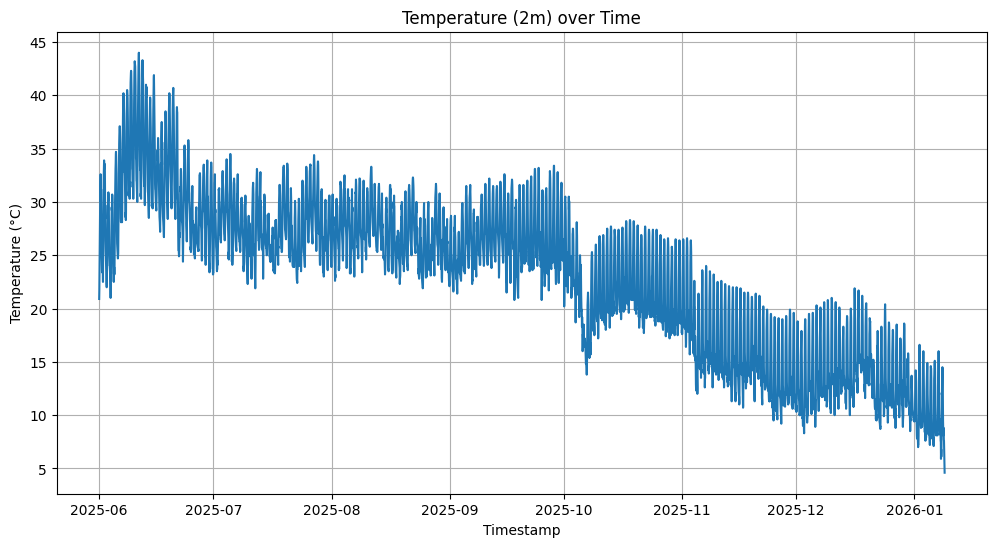

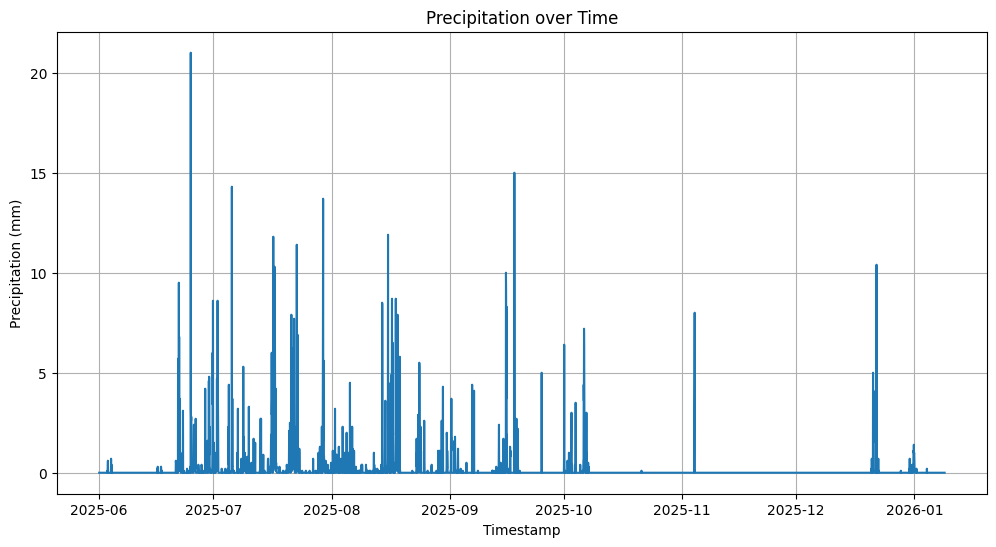

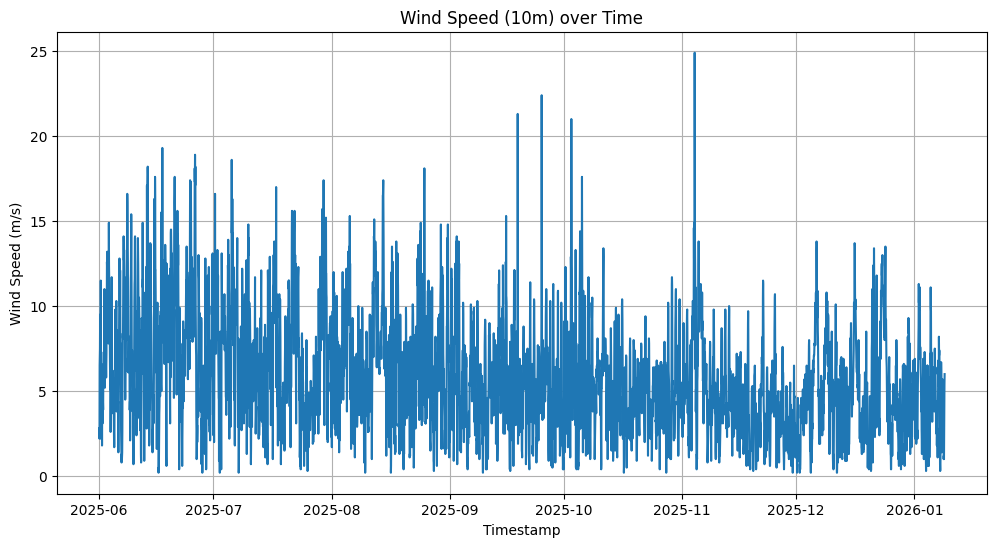

In [19]:
import matplotlib.pyplot as plt

# Plot temperature over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['temperature_2m'])
plt.title('Temperature (2m) over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Plot precipitation over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['precipitation'])
plt.title('Precipitation over Time')
plt.xlabel('Timestamp')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()

# Plot wind speed over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['wind_speed_10m'])
plt.title('Wind Speed (10m) over Time')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

## Summarize findings



**Data Overview**: The dataset comprises 5328 entries and 16 columns, covering various air quality and meteorological parameters for the city of Islamabad from June 2025 to January 2026. Importantly, there were no missing values across any of the columns, ensuring data completeness.

**Geographic Scope**: The 'city' column exclusively contained 'Islamabad', confirming that the data is geographically focused on a single location.

**Numerical Data Distribution**: Visualizations using histograms and box plots for key numerical features like pm10, pm2_5, carbon_monoxide, temperature_2m, and wind_speed_10m provided insights into their distributions, central tendencies, spread, and the presence of outliers. For instance, air pollutant concentrations and temperature exhibited varying ranges and distributions.

**Time Series Trends**:The timestamp column was successfully converted to datetime objects and set as the DataFrame index, enabling time-series analysis. Plots of temperature_2m, pm2_5, and wind_speed_10m over time revealed distinct temporal patterns, including seasonal variations in temperature and fluctuations in air pollutant levels and wind conditions.

The 24-hour rolling averages for temperature_2m and pm2_5 effectively smoothed out short-term noise, highlighting more significant, longer-term trends and seasonal cycles.
Correlations: A correlation matrix was generated for all numerical variables, visualized as a heatmap. This revealed linear relationships between different parameters. Notably, strong positive correlations were observed among various air quality indicators (e.g., pm10 and pm2_5). It also showed how weather variables might influence pollutant levels.